In [2]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

In [3]:
# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.26.4
TensorFlow 2.18.0
Keras 3.8.0


In [4]:
# Settings
nsamples = 1000     # Number of samples to use as a dataset
val_ratio = 0.2     # % of samples that should be held for validation set
test_ratio = 0.2    # % of samples that should be held for test set
tflite_model_name = 'sine_model'    # Will be given .tflite suffix
c_model_name = 'sine_model'         # Will be given .h suffix

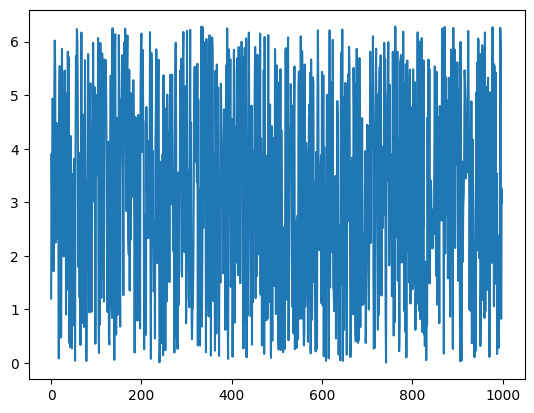

In [19]:
# Generate some random samples
np.random.seed(1234)
x_values = np.random.uniform(low=0, high=(2 * math.pi), size=nsamples)
plt.plot(x_values)

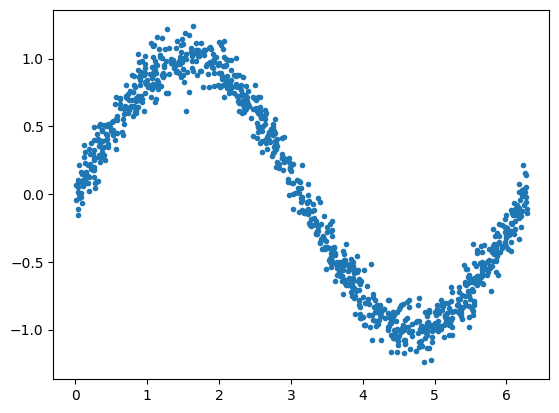

In [20]:
from re import X
# Create a noisy sinewave with these values
y_values = np.sin(x_values) + (0.1 * np.random.randn(x_values.shape[0]))
plt.plot(x_values, y_values, '.')

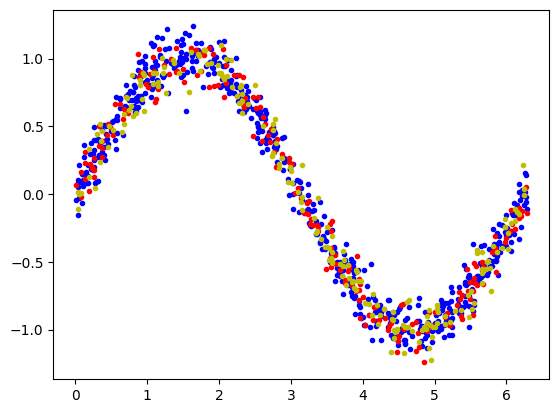

In [21]:
# Split the dataset into training, validation, and test sets
val_split = int(val_ratio * nsamples)
test_split = int(val_split + (test_ratio * nsamples))
x_val, x_test, x_train = np.split(x_values, [val_split, test_split])
y_val, y_test, y_train = np.split(y_values, (val_split, test_split))

# Check that our splits add up to nsamples
assert(x_train.size + x_val.size + x_test.size) == nsamples

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_val, y_val, 'y.', label="Validate")
plt.show()

In [23]:
# Create a model
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1,))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# View model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Add optimizer, loss function, and metrics to model and compile it
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

In [27]:
# Train model
history = model.fit(x_train,
                    y_train,
                    epochs=500,
                    batch_size=100,
                    validation_data=(x_val, y_val))

Epoch 1/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.2581 - mae: 1.2581 - val_loss: 1.0504 - val_mae: 1.0504
Epoch 2/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9625 - mae: 0.9625 - val_loss: 0.8694 - val_mae: 0.8694
Epoch 3/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7983 - mae: 0.7983 - val_loss: 0.7373 - val_mae: 0.7373
Epoch 4/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7148 - mae: 0.7148 - val_loss: 0.6379 - val_mae: 0.6379
Epoch 5/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6399 - mae: 0.6399 - val_loss: 0.5798 - val_mae: 0.5798
Epoch 6/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5821 - mae: 0.5821 - val_loss: 0.5477 - val_mae: 0.5477
Epoch 7/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5664 - mae: 0.5664 - val_loss: 0.5291 - val_mae: 0.5291
Epoch 8/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5622 - mae: 0.5622 - val_loss: 0.5176 - val_mae: 0.5176
Epoch 9/500
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5441 - mae: 

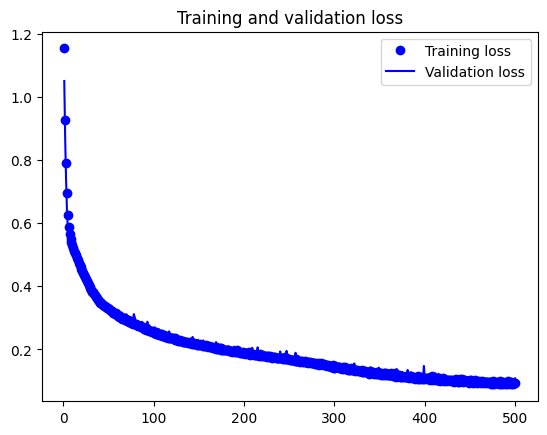

In [28]:
# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


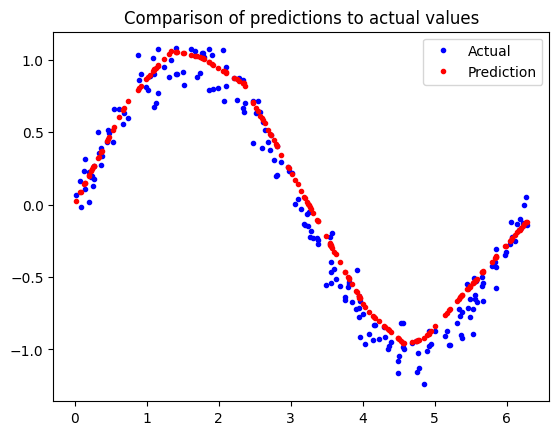

In [29]:
# Plot predictions against actual values
predictions = model.predict(x_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Prediction')
plt.legend()
plt.show()


In [14]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

Saved artifact at '/tmp/tmpn408uhyq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135795435222992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135795435223568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135795435224912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135795435224720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135795435223184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135795435710864: TensorSpec(shape=(), dtype=tf.resource, name=None)


3168

In [15]:
# ***** --- Continue from 8:00 in tutorial --- *****